<a href="https://colab.research.google.com/github/ibonetc/Data_Analytics/blob/main/NLP/Procesamiento_de_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento del lenguaje natural
El procesamiento del lenguaje natural tiene varias tareas y varios pasos

In [1]:
!pip install pyLDAvis

## Extracción de texto
Para trabajar con texto lo primero es escoger el texto que vamos a analizar.

En este ejemplo vamos a usar un corpus de texto en español, que tiene un conjunto de noticias en español.

In [2]:
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [3]:
print(cess_esp.readme())

CESS-ESP and CESS-CAT TREEBANK

The Universitat de Barcelona (CLiC-UB), the Universidad de Alicante
(UA), the Universitat PolitÃšcnica de Catalunya (UPC), and the Euskal
Herriko Unibertsitatea (EHU-UPV) are the sole and exclusive owners of
the CESS-Esp treebank.  Information for this corpus can be found at:
http://www.lsi.upc.edu/~mbertran/cess-ece2/

The goal of the CESS-ECE project is to create three corpora, one for
Spanish (CESS-ESP), one for Catalan (CESS-Cat) and one for Basque
(CESS-EUS), of 500,000 words for CESS-Esp and CESS-Cat and 350,000
words for the CESS-Eus. These corpora will be tagged in two ways:
syntactically (with constituents and functions for CESS-Esp and
CESS-Cat and with dependencies for CESS-Eus) and semantically (with
WordNet synsets). This project is based on resources from 3LB Project
(FIT 150500-2002-244), where 100,000 words per language were annotated
in the same way.

The version distributed with NLTK are syntactic treebanks (with
constituents and functi

In [4]:
cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [5]:
cess_esp.fileids()

['10017_20000413.tbf',
 '10044_20000313.tbf',
 '10049_20001114.tbf',
 '10055_20000713.tbf',
 '10080_20000914.tbf',
 '10084_20000313_1.tbf',
 '10084_20000313_2.tbf',
 '10127_20001013_1.tbf',
 '10127_20001013_2.tbf',
 '10127_20001013_3.tbf',
 '10150_20001114_1.tbf',
 '10150_20001114_2.tbf',
 '10150_20001114_3.tbf',
 '10150_20001114_4.tbf',
 '10150_20001114_5.tbf',
 '10168_20000212.tbf',
 '10209_20001114.tbf',
 '10226_20000714.tbf',
 '10242_20000816_1.tbf',
 '10242_20000816_2.tbf',
 '10242_20000816_3.tbf',
 '10268_20000413_1.tbf',
 '10268_20000413_2.tbf',
 '10295_20000613_1.tbf',
 '10295_20000613_2.tbf',
 '10376_20001114_1.tbf',
 '10376_20001114_2.tbf',
 '10409_20000413.tbf',
 '10477_20001114.tbf',
 '104_C-4.tbf',
 '104_C-5.tbf',
 '104_C-6.tbf',
 '104_c-1.tbf',
 '104_c-2.tbf',
 '104_c-3.tbf',
 '10568_20001013_1.tbf',
 '10568_20001013_2.tbf',
 '10583_20000714.tbf',
 '10585_20000213.tbf',
 '10585_20000313.tbf',
 '10591_20001013_1.tbf',
 '10591_20001013_2.tbf',
 '10646_20000313.tbf',
 '10656

In [6]:
cess_esp.tagged_words(cess_esp.fileids()[1])

[('La', 'da0fs0'), ('alcaldesa', 'ncfs000'), ...]

In [7]:
sentences=cess_esp.parsed_sents(cess_esp.fileids()[1])
sentences

[Tree('S', [Tree('snp.x-SUJ', [Tree('espec.fs', [Tree('da0fs0', ['La'])]), Tree('grup.nom.co', [Tree('grup.nom.fs', [Tree('ncfs000', ['alcaldesa']), Tree('sp', [Tree('prep', [Tree('sps00', ['de'])]), Tree('snl', [Tree('grup.nom', [Tree('np0000l', ['Málaga'])])])])]), Tree('coord', [Tree('cc', ['y'])]), Tree('grup.nom.fs', [Tree('ncfs000', ['cabeza']), Tree('sp', [Tree('prep', [Tree('sps00', ['de'])]), Tree('sna', [Tree('grup.nom.fs', [Tree('ncfs000', ['lista']), Tree('sp', [Tree('prep', [Tree('spcms', ['del'])]), Tree('sno', [Tree('grup.nom.ms', [Tree('np0000o', ['PP'])])])]), Tree('sp', [Tree('prep', [Tree('spcms', ['al'])]), Tree('sn', [Tree('grup.nom.ms', [Tree('np0000o', ['Congreso'])])])]), Tree('sp', [Tree('prep', [Tree('sps00', ['por'])]), Tree('sn', [Tree('espec.fs', [Tree('dd0fs0', ['esta'])]), Tree('grup.nom.fs', [Tree('ncfs000', ['provincia'])])])])])])])]), Tree('snp', [Tree('Fc', [',']), Tree('grup.nom.fs', [Tree('np0000p', ['Celia_Villalobos'])]), Tree('Fc', [','])])])]),

In [8]:
!pip install svgling

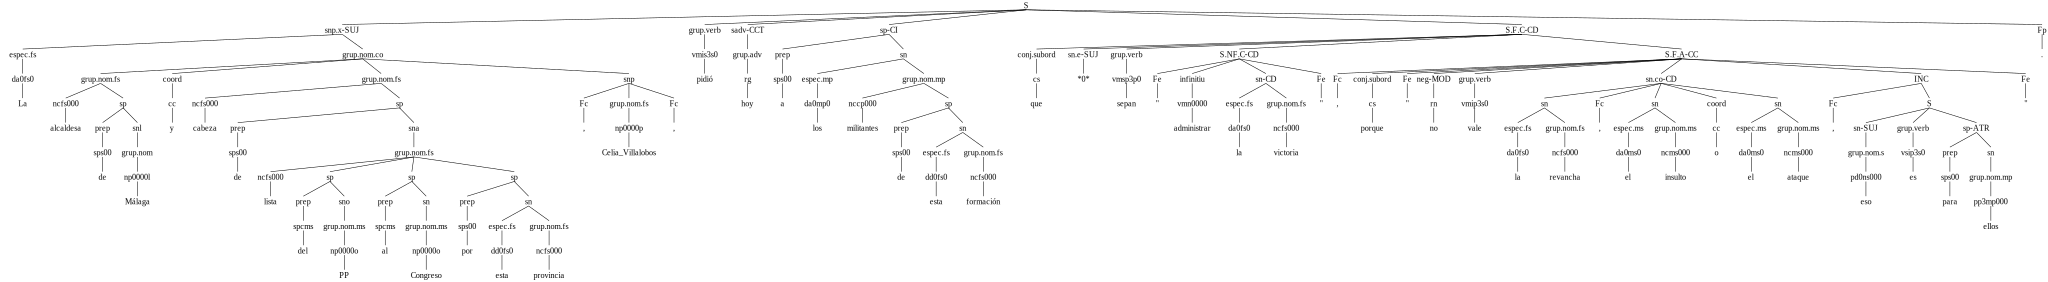

In [9]:
from IPython.display import display
display(sentences[0])

**Nota**: Aunque sí hay corpus de texto en español, no se pueden hacer todos los procesos.



# Ejemplo
Vamos a usar como ejemplo un pdf que esté público en internet.

Por ejemplo:

## Cargar pdf

In [10]:
!pip install PyPDF2

In [11]:
from urllib.request import Request, urlopen
from PyPDF2 import PdfReader
import pandas as pd
import io
#import requests

In [12]:
url='https://www.grupoexito.com.co/es/informe-de-sostenibilidad-grupo-exito-2019.pdf'
remote_file = urlopen(Request(url)).read()
memory_file = io.BytesIO(remote_file)
pdf_file = PdfReader(memory_file)

In [13]:
num_pages = len(pdf_file.pages)
print(f"Número de páginas: {num_pages}")

Número de páginas: 70


## Extraer contenido del pdf
Después de cargar el pdf

In [14]:
text_content = [p.extract_text() for p in pdf_file.pages]

In [15]:
text_content

['INFORME IN TEGRADO2019',
 'Sostenibilidad\nN\nue\ns\nt\nr\na e\ns\nt\nr\na\nte\ng\nia so\n s\ntenible cont\n r\nib\nu\ny\nu\ny\nu\ne \nal desar\n r\nollo social, al c\n r\necimien\n t\no de nue\n s\nt\nr\nos \np\nr\no\nv\needo\n r\nes, a la p\n r\notección del ambiente, \na la p\n r\nomoción de hábi\n t\nos saludables \ny al biene\n s\ntar de nue\n s\nt\nr\nos colabo\n r\na\ndo\nr\nes.\n',
 'Análisis de materialidad\nEl análisis de materialidad que fue presentado en el 2019 nos permitió \n-\nciales, ambientales y económicos. \nLos programas que lideramos desde la estrategia de sostenibilidad, \nestán alineados con el análisis de materialidad y los asuntos priorizados \npor los diferentes grupos de interés –clientes, proveedor es, líderes de \nopinión, medios de comunicación, empleados, Junta Directiva, alta di-\nrección y Comité ejecutivo, con los análisis técnicos del sector y con la \nreferenciación de los líder es del comer cio en el mundo.\nImportancia de los impactos económicos,

Unir el texto, sin cambios de líneas

In [16]:
text_data="\n".join(text_content)
text_data

'INFORME IN TEGRADO2019\nSostenibilidad\nN\nue\ns\nt\nr\na e\ns\nt\nr\na\nte\ng\nia so\n s\ntenible cont\n r\nib\nu\ny\nu\ny\nu\ne \nal desar\n r\nollo social, al c\n r\necimien\n t\no de nue\n s\nt\nr\nos \np\nr\no\nv\needo\n r\nes, a la p\n r\notección del ambiente, \na la p\n r\nomoción de hábi\n t\nos saludables \ny al biene\n s\ntar de nue\n s\nt\nr\nos colabo\n r\na\ndo\nr\nes.\n\nAnálisis de materialidad\nEl análisis de materialidad que fue presentado en el 2019 nos permitió \n-\nciales, ambientales y económicos. \nLos programas que lideramos desde la estrategia de sostenibilidad, \nestán alineados con el análisis de materialidad y los asuntos priorizados \npor los diferentes grupos de interés –clientes, proveedor es, líderes de \nopinión, medios de comunicación, empleados, Junta Directiva, alta di-\nrección y Comité ejecutivo, con los análisis técnicos del sector y con la \nreferenciación de los líder es del comer cio en el mundo.\nImportancia de los impactos económicos, ambien

## WordCloud

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

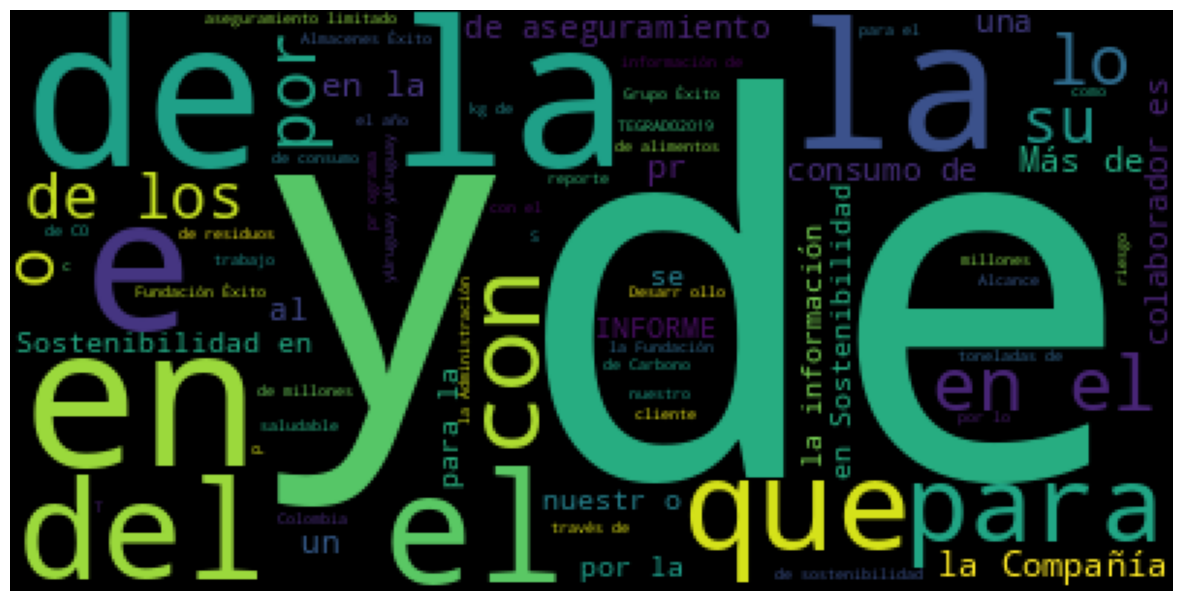

In [18]:
wordcloud = WordCloud().generate(text_data)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

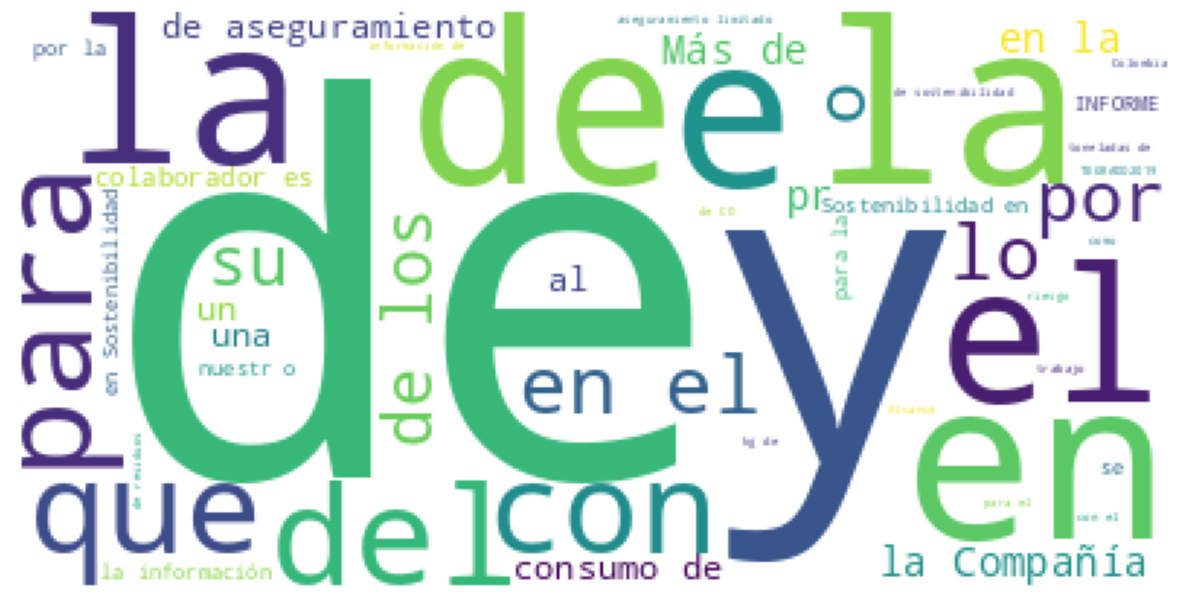

In [19]:
wordcloud = (WordCloud(background_color="white",
                      max_words=50)
                      .generate(text_data))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")

In [20]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
de,1.000000
y,0.637868
de la,0.295956
en,0.281250
e,0.248162
la,0.227941
el,0.202206
del,0.183824
que,0.163603
para,0.161765


<Axes: >

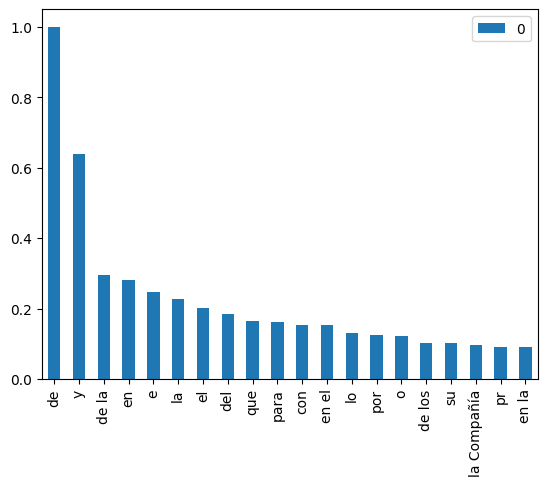

In [21]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

## Limpieza de texto

Hay varios pasos para hacer limpieza de texto.

Después de extraer el texto se debe:
- Limpiar texto con expresiones regulares
- Quitar stopwords
- Quitar palabras que no tienen significado en ese texto específico

Para visualizar las cómo se van comportando las palabras del texto vamos a usar WordClouds

### Uso de expresiones regulares

In [22]:
import re

In [23]:
df=pd.DataFrame(text_content,columns=['text'])
df

,text
0,INFORME IN TEGRADO2019
1,Sostenibilidad\nN\nue\ns\nt\nr\na e\ns\nt\nr\n...
2,Análisis de materialidad\nEl análisis de mater...
3,1\n2\n123\n13\n5415\n67\n178\n18\n1910\n2011\n...
4,Sostenibilidad a partir \nde una estrategia c...
...,...
65,PwC 7 \n \nIndicadores objetos \nde asegura...
66,PwC 8 \n \nIndicadores objetos \nde asegura...
67,PwC 9 \n \nIndicadores objetos \nde asegura...
68,PwC 10 \n \nIndicadores objetos \nde asegur...


In [24]:
df['text'][68]

'PwC  10   \n \nIndicadores objetos \nde aseguramiento \nlimitado   \nCriterio  Nada llamó \nnuestra atención \n(\uf0fc) – N/A \n b. Residuos peligrosos: corresponde a la cantidad total de residuos peligrosos que fueron \ngenerados por la Compañía (servicios de Retail, Cedi y HQ) y fueron tratados para su adecuada \ndisposición final. Esta información se incluye en el documento “CONSOLIDADO RESIDUOS 2019.xlsx”, el cual es administrado por el Área de Gestión Ambiental de la Compañía y es \nsoportado por los certificados de disposición final de este tipo de residuos.  \nc. Aceite de cocina usado: corresponde a la cantidad total de aceite de cocina usado que fue \ngenerado por la Compañía (servicios de Retail y Cedi) y fue tratado para su adecuada disposición \nfinal. Esta información se incluye en el documento “CONSOLIDADO RESIDUOS 2019.xlsx”, el \ncual es administrado por el Área de Gestión Ambiental de la Compañía y es soportado por los certificados de disposición final de este tipo de

#### Buscar url o ficheros en el texto

In [25]:
re.findall(
    '(((?:http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+(?:[-.]{1}\w+)*\.[a-z]{2,5}(?:\/)?(?:(?:[^\s@])*(?:\/)?)*))',
    text_data
    )

[('oagro.com', 'oagro.com'),
 ('www.grupoexito.com.co)', 'www.grupoexito.com.co)'),
 ('www.pwc.com/co', 'www.pwc.com/co'),
 ('éxito.docx”', 'éxito.docx”'),
 ('Exito.xlsx”.', 'Exito.xlsx”.'),
 ('2019.xlsx”', '2019.xlsx”'),
 ('2019.xlsx”,', '2019.xlsx”,'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emisiones/'),
 ('calculadora.html', 'calculadora.html'),
 ('éxito.docx”', 'éxito.docx”'),
 ('Exito.xlsx”.', 'Exito.xlsx”.'),
 ('http://www.upme.gov.co/Calculadora_Emisiones/',
  'http://www.upme.gov.co/Calculadora_Emis

Buscar emails en el texto

In [26]:
p= re.compile(r'(\b[a-z]+[a-z0-9]*[-._]?[a-z0-9]+@[a-z]+(?:[.][a-z]+[_]?[a-z0-9]+)*[.][a-z]{2,})',re.MULTILINE)
p.findall(text_data)

[]

### Uso de expresiones regulares para limpiar texto
Los textos siempre tienen ruido que nos impiden hacer un buen análisis del mismo. Por eso, lo primero que normalmente hacemos es una limpieza del texto eliminando de él todo aquello que no influye en entender de qué trata.

1.   Eliminamos las URL
2.   Eliminamos correos electrónicos
2.   Eliminamos hashtags
2.   Eliminamos menciones que se suelen hacer con @Nombre
2.   Eliminamos los números
2.   Eliminamos signos de puntuación


In [27]:
from string import punctuation

In [28]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

patternURLEMAIL=r'
((\w+\.)*\w+@(\w+\.)+\w+)
|
(
  (http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*
  )'

In [29]:
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos, si son tweets
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @ para tweets
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’'])
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  return df

In [30]:
df_clean = clean_text(df.copy(), 'text')
df_clean.head(6)

,text
0,informe in tegrado
1,sostenibilidad n ue s t r a e s t r a te g ia ...
2,análisis de materialidad el análisis de materi...
3,temas estratégicos democratización de estilos...
4,sostenibilidad a partir de una estrategia corp...
5,riesgos de sostenibilidad les riesgos estratég...


## StopWords

La biblioteca Natural Language Toolkit (NLTK) tiene funciones para eliminar stopwords en diferentes idiomas.

In [31]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [33]:
df_clean['content'] = df_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,text,content
0,informe in tegrado,informe in tegrado
1,sostenibilidad n ue s t r a e s t r a te g ia ...,sostenibilidad n ue s t r s t r g ia so s teni...
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...


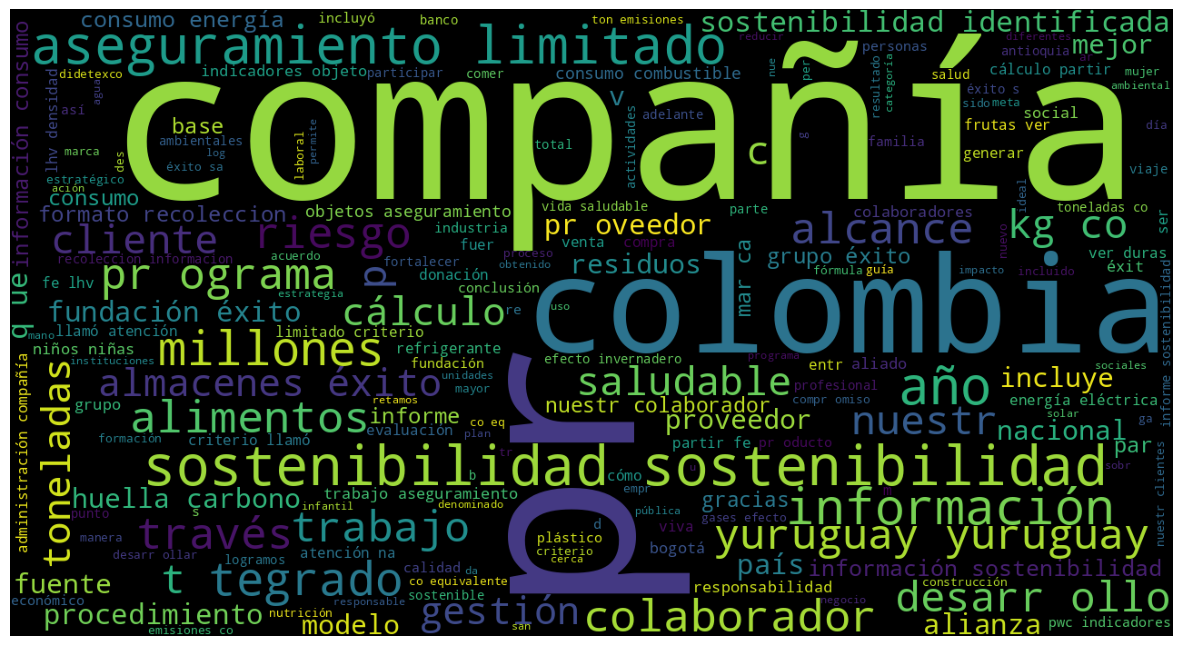

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'yuruguay','y uruguay', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'desarr ollo','desarrollo', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'pr ograma','programa', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'in tegrado','integrado', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'éxit o','éxito', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'nuestr o','nuestro', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'compr omiso','compromiso', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'empres a','empresa', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'empr esa','empresa', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'pr oveedor','proveedor', elem))
df_clean['content'] = df_clean['content'].apply(lambda elem: re.sub(r'q ue','que', elem))

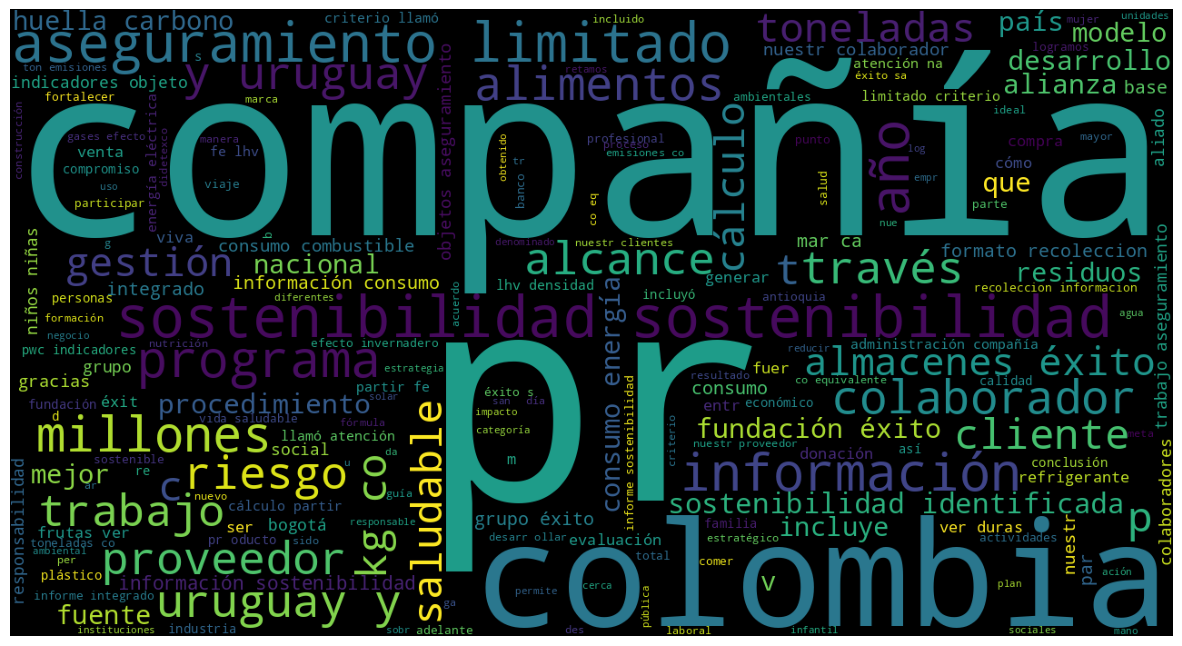

In [36]:
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

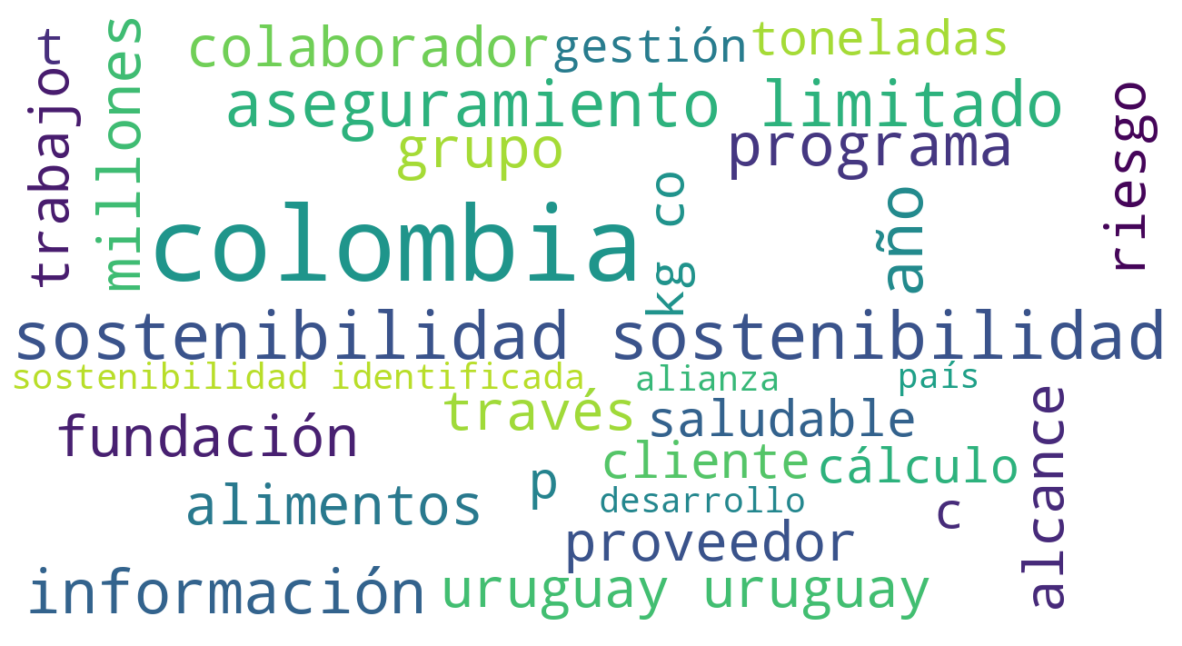

In [37]:
stop.extend(['pr','éxito', 'compañía'])
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(background_color="white", max_words=30, contour_width=5, contour_color='steelblue', width=1280, height=690)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenización

Es el proceso de dividir el texto en tokens (palabras, bigramas, secuencias...)

In [38]:
import itertools
import collections
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
df_clean['tokens'] = df_clean['content'].apply(lambda x: word_tokenize(x))
df_clean.head()

,text,content,tokens
0,informe in tegrado,informe integrado,"[informe, integrado]"
1,sostenibilidad n ue s t r a e s t r a te g ia ...,sostenibilidad n ue s t r s t r g ia so s teni...,"[sostenibilidad, n, ue, s, t, r, s, t, r, g, i..."
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida..."
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...,"[temas, estratégicos, democratización, estilos..."
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati..."


In [40]:
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

In [41]:
df_clean

,text,content,tokens,tokens_clean
0,informe in tegrado,informe integrado,"[informe, integrado]","[informe, integrado]"
1,sostenibilidad n ue s t r a e s t r a te g ia ...,sostenibilidad n ue s t r s t r g ia so s teni...,"[sostenibilidad, n, ue, s, t, r, s, t, r, g, i...","[sostenibilidad, ue, ia, so, tenible, cont, ib..."
2,análisis de materialidad el análisis de materi...,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida...","[análisis, materialidad, análisis, materialida..."
3,temas estratégicos democratización de estilos...,temas estratégicos democratización estilos vid...,"[temas, estratégicos, democratización, estilos...","[temas, estratégicos, democratización, estilos..."
4,sostenibilidad a partir de una estrategia corp...,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati...","[sostenibilidad, partir, estrategia, corporati..."
...,...,...,...,...
65,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."
66,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."
67,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."
68,pwc indicadores objetos de aseguramiento limit...,pwc indicadores objetos aseguramiento limitado...,"[pwc, indicadores, objetos, aseguramiento, lim...","[pwc, indicadores, objetos, aseguramiento, lim..."


## Frecuencia de palabras
Después de quitar los stopwords, procemos a calcular la frecuencia de palablas

In [42]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [43]:
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('sostenibilidad', 70),
 ('información', 61),
 ('aseguramiento', 51),
 ('consumo', 50),
 ('colaborador', 41),
 ('co', 41),
 ('nuestr', 38),
 ('colombia', 37),
 ('millones', 35),
 ('residuos', 35),
 ('on', 33),
 ('limitado', 32),
 ('informe', 31),
 ('trabajo', 31),
 ('kg', 31),
 ('emisiones', 30),
 ('proveedor', 29),
 ('grupo', 29),
 ('cálculo', 29),
 ('toneladas', 28),
 ('uruguay', 26),
 ('integrado', 25),
 ('través', 25),
 ('año', 25),
 ('alcance', 25),
 ('vida', 24),
 ('desarrollo', 24),
 ('fundación', 24),
 ('alimentos', 23),
 ('clientes', 23),
 ('criterio', 23),
 ('almacenes', 22),
 ('comer', 20),
 ('cr', 20),
 ('ca', 20)]

## Frecuencia de bigramas

In [44]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [45]:
text = ' '.join(txt for txt in df_clean.content)
text

'informe integrado sostenibilidad n ue s t r s t r g ia so s tenible cont r ib u u u desar r ollo social c r ecimien t nue s t r p r v eedo r p r otección ambiente p r omoción hábi t saludables biene s tar nue s t r colabo r do r análisis materialidad análisis materialidad presentado permitió ciales ambientales económicos programas lideramos estrategia sostenibilidad alineados análisis materialidad asuntos priorizados diferentes grupos interés –clientes proveedor líderes opinión medios comunicación empleados junta directiva alta di rección comité ejecutivo análisis técnicos sector referenciación líder comer cio mundo importancia impactos económicos ambientales sociales económicos ambientales socialesinﬂuencia evaluaciones decisiones grupos inter és bajabaja mediamedia altaalta informe integrado temas estratégicos democratización estilos vida saludable ofrecer cliente portafolio productos guros calidad incluye alimentos necesidades especiales or gánicos saludables así mismo proveer info

In [46]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean if t!=[]]

In [47]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('sostenibilidad', 'sostenibilidad'), 35),
 (('aseguramiento', 'limitado'), 32),
 (('uruguay', 'uruguay'), 22),
 (('kg', 'co'), 18),
 (('sostenibilidad', 'identificada'), 16),
 (('huella', 'carbono'), 14),
 (('información', 'sostenibilidad'), 14),
 (('consumo', 'energía'), 13),
 (('información', 'consumo'), 13),
 (('formato', 'recoleccion'), 13),
 (('nuestr', 'colaborador'), 12),
 (('objetos', 'aseguramiento'), 12),
 (('niños', 'niñas'), 11),
 (('trabajo', 'aseguramiento'), 11),
 (('fuer', 'on'), 10)]

In [48]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [49]:
bigram_df

,bigram,count
0,"(sostenibilidad, sostenibilidad)",35
1,"(aseguramiento, limitado)",32
2,"(uruguay, uruguay)",22
3,"(kg, co)",18
4,"(sostenibilidad, identificada)",16
5,"(huella, carbono)",14
6,"(información, sostenibilidad)",14
7,"(consumo, energía)",13
8,"(información, consumo)",13
9,"(formato, recoleccion)",13


In [50]:
d = bigram_df.set_index('bigram').T.to_dict('records')

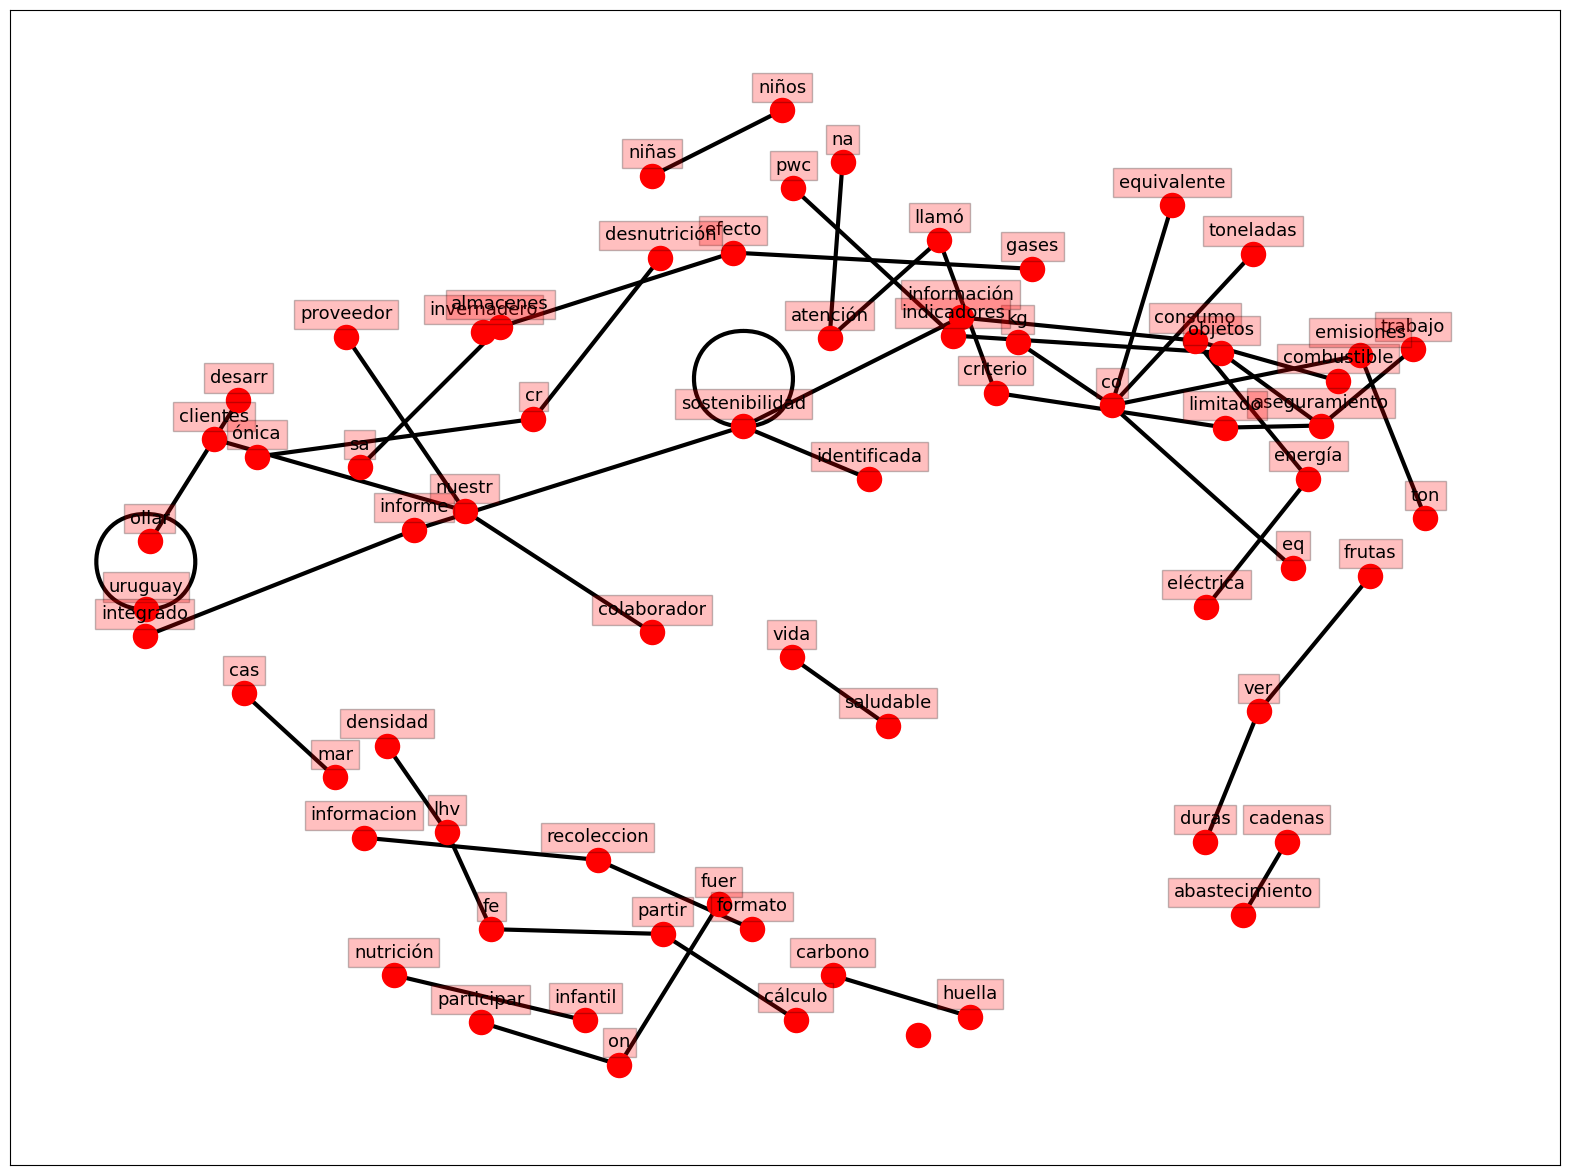

In [51]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)
plt.show()

# Lematización (Lemmatization)
Es la acción de identificar en el texto, dada una forma flexionada, el lema correspondiente.

Se entiende como forma flexionada de una palabra, el plural, femenino, o conjugación de un verbo.

El lema es la forma que representa todas las formas flexionadas de una misma palabra.

Por ejemplo, el lema de una conjugación de un verbo es el verbo en infinitivo. De un sustantivo en plural, es el sustantivo en singular y masculino.

In [52]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

2023-08-29 21:40:11.518870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [53]:
import es_core_news_sm
nlp = es_core_news_sm.load()

La descripción de las diferentes abreviaturas la puede encontrar en: https://spacy.io/api/annotation#pos-tagging

In [54]:
print(df_clean.content[10])
d=nlp(df_clean.content[10])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

recuperación excedentes agropecuarios través reagro antioquia mano saciar recuperar on toneladas personas mar co fundación evitar pér dida alimentos reagro nacional recuperar on toneladasmás alimentos donados gracias aporte grupo grupo éxit retail país aliment entr ega bancos aliment través f undación éxit aproximadamente toneladas alimentos alimentos fuer on donados bancos alimentos instituciones gestión bancos alimentos “la fundación éxit contr ibuido niños niñas alimenten mejor ma dres reciban mejor inf ormación sobr nutr ición infantil ” leonardo mengual wayúinforme integrado


[['recuperación', 'recuperación', 'NOUN', ''],
 ['excedentes', 'excedente', 'ADJ', ''],
 ['agropecuarios', 'agropecuario', 'ADJ', ''],
 ['través', 'través', 'ADP', ''],
 ['reagro', 'reagro', 'PROPN', ''],
 ['antioquia', 'antioquia', 'NOUN', 'LOC'],
 ['mano', 'mano', 'ADJ', ''],
 ['saciar', 'saciar', 'VERB', ''],
 ['recuperar', 'recuperar', 'VERB', ''],
 ['on', 'on', 'NUM', ''],
 ['toneladas', 'tonelada', 'NOUN', ''],
 ['personas', 'persona', 'ADJ', ''],
 ['mar', 'mar', 'NOUN', ''],
 ['co', 'co', 'ADP', ''],
 ['fundación', 'fundación', 'PROPN', ''],
 ['evitar', 'evitar', 'VERB', ''],
 ['pér', 'pér', 'VERB', ''],
 ['dida', 'dido', 'ADJ', ''],
 ['alimentos', 'alimento', 'NOUN', ''],
 ['reagro', 'reagro', 'ADJ', ''],
 ['nacional', 'nacional', 'ADJ', ''],
 ['recuperar', 'recuperar', 'VERB', ''],
 ['on', 'on', 'ADJ', ''],
 ['toneladasmás', 'toneladasmás', 'NOUN', ''],
 ['alimentos', 'alimento', 'NOUN', ''],
 ['donados', 'donado', 'ADJ', ''],
 ['gracias', 'gracias', 'SCONJ', ''],
 ['aporte', 

Por ejemplo, detectar los sustantivos en un texto

In [55]:
for noun in d.noun_chunks:
  print(noun.text)

recuperación excedentes agropecuarios
reagro antioquia mano
on toneladas personas
mar
dida alimentos
on toneladasmás alimentos donados
grupo grupo éxit retail país
aliment entr ega bancos aliment
través f undación éxit
on donados
gestión
bancos alimentos
“
la fundación éxit
niños niñas
ma dres
inf ormación sobr nutr ición infantil ” leonardo mengual wayúinforme


In [56]:
[[tok.lemma_] for tok in d]

[['recuperación'],
 ['excedente'],
 ['agropecuario'],
 ['través'],
 ['reagro'],
 ['antioquia'],
 ['mano'],
 ['saciar'],
 ['recuperar'],
 ['on'],
 ['tonelada'],
 ['persona'],
 ['mar'],
 ['co'],
 ['fundación'],
 ['evitar'],
 ['pér'],
 ['dido'],
 ['alimento'],
 ['reagro'],
 ['nacional'],
 ['recuperar'],
 ['on'],
 ['toneladasmás'],
 ['alimento'],
 ['donado'],
 ['gracias'],
 ['aporte'],
 ['grupo'],
 ['grupo'],
 ['éxit'],
 ['retail'],
 ['país'],
 ['aliment'],
 ['entr'],
 ['egar'],
 ['banco'],
 ['aliment'],
 ['través'],
 ['f'],
 ['undación'],
 ['éxit'],
 ['aproximadamente'],
 ['tonelada'],
 ['alimento'],
 ['alimento'],
 ['fuer'],
 ['on'],
 ['donado'],
 ['banco'],
 ['alimento'],
 ['institución'],
 ['gestión'],
 ['bancos'],
 ['alimento'],
 ['“'],
 ['el'],
 ['fundación'],
 ['éxit'],
 ['contr'],
 ['ibuido'],
 ['niño'],
 ['niñas'],
 ['alimentir'],
 ['mejor'],
 ['mo'],
 ['dr'],
 ['recir'],
 ['mejor'],
 ['inf'],
 ['ormación'],
 ['sobr'],
 ['nutr'],
 ['ición'],
 ['infantil'],
 ['”'],
 ['leonardo'],
 

In [57]:
df_clean['lemmas'] = df_clean.content.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [58]:
df_clean[['content','lemmas']].head()

,content,lemmas
0,informe integrado,"[informir, integrado]"
1,sostenibilidad n ue s t r s t r g ia so s teni...,"[sostenibilidad, n, ue, s, t, r, s, t, r, g, i..."
2,análisis materialidad análisis materialidad pr...,"[análisis, materialidad, análisis, materialida..."
3,temas estratégicos democratización estilos vid...,"[tema, estratégico, democratización, estilo, v..."
4,sostenibilidad partir estrategia corporativa c...,"[sostenibilidad, partir, estrategia, corporati..."


In [59]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('r', 96),
 ('sostenibilidad', 70),
 ('información', 61),
 ('“', 55),
 ('colaborador', 52),
 ('aseguramiento', 51),
 ('consumo', 50),
 ('”', 48),
 ('\uf0fc', 48),
 ('co', 44),
 ('emisión', 42),
 ('nuestr', 38),
 ('criterio', 36),
 ('millón', 35),
 ('proveedor', 34)]

Algo interesante de este módulo es si usamos la frase completa, es capaz de hacer el análisis completo de la oración y podemos visualizar el gráfico de dependencias.

La lista de depndencias pueden verla aquí:
https://universaldependencies.org/u/dep/index.html

In [60]:
ejemploOracion = nlp('El curso de analítica de datos de la Universidad EIA de la profesora Isis tiene un grupo de estudiantes muy brillantes')
spacy.displacy.render(ejemploOracion, style='dep', jupyter=True, options={'distance': 90})

Identificación de la entidades en el texto:

En este ejemplo reconoce Persona: Isis y Organización: Universidad EIA

In [61]:
[(e,  e.label_) for e in ejemploOracion.ents]

[(Universidad EIA, 'ORG'), (Isis, 'PER')]

# Radicalización (Stemming)
Stremming es el proceso de llevar las palabras a su forma raíz.

Después de dividido el texto en palabras, pasamos a hacer el stemming. Para hacerlo en idioma español debemos usar la librería SnowballStemmer, que permite varios lenguajes además del inglés.

In [62]:
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer ## Para poder hacerlo con idiomas diferentes al inglés

In [63]:
stemmer_spanish = SnowballStemmer("spanish")

In [64]:
df_clean['tokens_stem'] = df_clean['tokens'].apply(lambda text: [s for s in [stemmer_spanish.stem(i) for i in text] if s.isalpha() and len(s) > 1])

In [65]:
df_clean[['tokens','tokens_stem']].head(5)

,tokens,tokens_stem
0,"[informe, integrado]","[inform, integr]"
1,"[sostenibilidad, n, ue, s, t, r, s, t, r, g, i...","[sostenibil, ue, ia, so, tenibl, cont, ib, des..."
2,"[análisis, materialidad, análisis, materialida...","[analisis, material, analisis, material, prese..."
3,"[temas, estratégicos, democratización, estilos...","[tem, estrateg, democratiz, estil, vid, salud,..."
4,"[sostenibilidad, partir, estrategia, corporati...","[sostenibil, part, estrategi, corpor, constru,..."


In [66]:
path='/content/drive/MyDrive/Analitics_Esp'
df_clean.to_csv(path+'informeSostenibilidad.csv', encoding='utf-8-sig')

In [67]:
#df = pd.read_csv(path+'informeSostenibilidad.csv', encoding='utf-8-sig')

# Bag of Words

In [68]:
import gensim
from gensim import corpora
import numpy as np

In [69]:
words=[]
for w in df_clean.lemmas:
  words.append(w)

In [70]:
words

[['informir', 'integrado'],
 ['sostenibilidad',
  'n',
  'ue',
  's',
  't',
  'r',
  's',
  't',
  'r',
  'g',
  'ia',
  'so',
  's',
  'tenible',
  'cont',
  'r',
  'ib',
  'u',
  'u',
  'u',
  'desar',
  'r',
  'ollo',
  'social',
  'c',
  'r',
  'ecimien',
  't',
  'nue',
  's',
  't',
  'r',
  'p',
  'r',
  'v',
  'eedo',
  'r',
  'p',
  'r',
  'otección',
  'ambiente',
  'p',
  'r',
  'omoción',
  'hábi',
  't',
  'saludable',
  'bienir',
  's',
  'tar',
  'nue',
  's',
  't',
  'r',
  'colabir',
  'r',
  'do',
  'r'],
 ['análisis',
  'materialidad',
  'análisis',
  'materialidad',
  'presentado',
  'permitir',
  'cial',
  'ambiental',
  'económico',
  'programa',
  'liderar',
  'estrategia',
  'sostenibilidad',
  'alinear',
  'análisis',
  'materialidad',
  'asuntos',
  'priorizado',
  'diferente',
  'grupo',
  'interés',
  '–',
  'cliente',
  'proveedor',
  'líder',
  'opinión',
  'medios',
  'comunicación',
  'empleados',
  'junta',
  'directivo',
  'alto',
  'di',
  'rección'

In [71]:
dic=corpora.Dictionary(words)

In [72]:
bow_corpus = [dic.doc2bow(w) for w in words]

Crear un modelo para clasificar el texto

In [73]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.013*"r" + 0.008*"tonelada" + 0.008*"colombia" + 0.006*"nuestr" + 0.006*"proveedor" + 0.006*"desarrollo" + 0.006*"on" + 0.006*"colaborador" + 0.005*"riesgo" + 0.005*"integrado"'),
 (1,
  '0.016*"información" + 0.016*"aseguramiento" + 0.014*"\uf0fc" + 0.011*"criterio" + 0.011*"emisión" + 0.010*"limitado" + 0.010*"co" + 0.010*"“" + 0.010*"kg" + 0.009*"cálculo"'),
 (2,
  '0.012*"r" + 0.012*"consumo" + 0.010*"”" + 0.006*"energía" + 0.005*"p" + 0.005*"“" + 0.005*"formato" + 0.005*"recoleccion" + 0.004*"t" + 0.004*"v"'),
 (3,
  '0.023*"sostenibilidad" + 0.015*"uruguay" + 0.010*"colaborador" + 0.006*"r" + 0.005*"nuestr" + 0.005*"social" + 0.004*"millón" + 0.003*"vida" + 0.003*"saludable" + 0.003*"programa"')]

In [74]:
import pyLDAvis.gensim_models

In [75]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.200135 -0.004547       1        1  32.150252
0     -0.094957  0.020508       2        1  31.961224
2     -0.061888 -0.116497       3        1  23.897454
3     -0.043291  0.100536       4        1  11.991070, topic_info=                Term       Freq      Total Category  logprob  loglift
26    sostenibilidad  48.000000  48.000000  Default  30.0000  30.0000
2293   aseguramiento  41.000000  41.000000  Default  29.0000  29.0000
2560                 38.000000  38.000000  Default  28.0000  28.0000
150      información  48.000000  48.000000  Default  27.0000  27.0000
1038         uruguay  16.000000  16.000000  Default  26.0000  26.0000
...              ...        ...        ...      ...      ...      ...
560          gestión   2.275354  12.591383   Topic4  -6.0409   0.4101
36         ambiental   2.243136  15.865907   Topic4  -6.0552   0.1647
73         proveedor   2.018625  26.634007   Topic4  -6.1606  -0.4588
525        industria   1.903943   6.380337   Topic4  -6.2191   0.9117
615          familia   1.903528  10.346698   Topic4  -6.2193   0.4280

[257 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
81        2  0.849457  abastecimiento
1290      1  0.923528         acuerdo
2301      1  0.949938        adelante
2302      1  0.932562  administración
1225      1  0.946887         alcance
...     ...       ...             ...
437       2  0.191825               ”
437       3  0.520668               ”
437       4  0.054807               ”
2560      1  0.929308               
2560      3  0.051628               

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])